In [1]:
import requests
import json
import pandas as pd
from IPython.display import display
import ipywidgets as wdgets

In [2]:
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["name:en"="Taipei"];
(node["amenity"="bicycle_rental"]["operator:en"="YOUBIKE CO."](area);
 way["amenity"="bicycle_rental"]["operator:en"="YOUBIKE CO."](area);
 rel["amenity"="bicycle_rental"]["operator:en"="YOUBIKE CO."](area);
);
out center;
"""

response = requests.get(overpass_url, params={'data': overpass_query})
data_bike = response.json()

In [3]:
# convert Json to data frame
elem_bike = data_bike.get('elements',[])
df_bike = pd.json_normalize(elem_bike)

# Create a scrollable DataFrame display
output_bike = wdgets.Output()
with output_bike:
    display(df_bike)


In [4]:
scrollable_output_bike = wdgets.VBox([wdgets.Label('Youbike rental data'), output_bike])
scrollable_output_bike.layout = wdgets.Layout(overflow='auto', height='400px', border='1px solid black')

display(scrollable_output_bike)


In [5]:
# pip install numpy
# pip install matplotlib

In [6]:
import numpy as np
import matplotlib.pyplot as plt # 輸出圖表用

# Collect coords into list
coords = []
for element in data_bike['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))

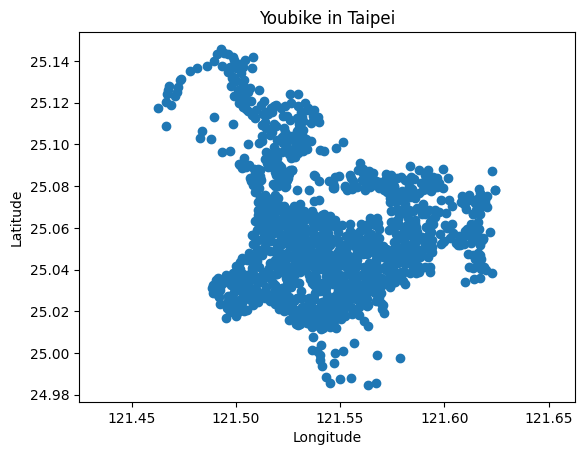

In [7]:
# Convert coordinates into numpy array
X = np.array(coords)

plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Youbike in Taipei')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [8]:
overpass_query = """
[out:json];
area["name:en"="Taipei"];
( 
node["railway"="station"]["station"="subway"](area);  // MRT
);
out center;
"""
response = requests.get(overpass_url, params={'data': overpass_query})
data_MRT = response.json()


In [9]:
# convert Json to data frame
elem_MRT = data_MRT.get('elements',[])
df_MRT = pd.json_normalize(elem_MRT)

# Create a scrollable DataFrame display
output_MRT = wdgets.Output()
with output_MRT:
    display(df_MRT)
    
scrollable_output_MRT = wdgets.VBox([wdgets.Label('MRT station data'), output_MRT])
scrollable_output_MRT.layout = wdgets.Layout(overflow='auto', height='400px', border='1px solid black')

display(scrollable_output_MRT)

In [10]:
# pip install --upgrade --force-reinstall geopandas

In [11]:
import geopandas as gpd
gdf = gpd.read_file("MRT_TP.geojson")
# Select some useful cols and print
cols = ['addr:city', 'addr:district', 'name', 'name:en','addr:street', 'addr:floor', 'wheelchair', 'toilets:wheelchair']
# Print only selected cols
gdf[cols].head(75)

,addr:city,addr:district,name,name:en,addr:street,addr:floor,wheelchair,toilets:wheelchair
0,臺北市,中正區,台電大樓,Taipower Building,羅斯福路三段,-1,yes,yes
1,臺北市,北投區,新北投,Xinbeitou,大業路,None,yes,yes
2,臺北市,內湖區,西湖,Xihu,內湖路一段,None,None,None
3,臺北市,文山區,辛亥,Xinhai,辛亥路四段,None,None,None
4,臺北市,文山區,萬芳醫院,Wanfang Hospital,興隆路三段,None,yes,None
...,...,...,...,...,...,...,...,...
70,台北市,中正區,小南門,Xiaonanmen,愛國西路,B1,yes,None
71,臺北市,大安區,忠孝新生,Zhongxiao Xinsheng,新生南路一段,None,limited,yes
72,臺北市,松山區,松山,Songshan,八德路四段,None,yes,None
73,臺北市,中正區,台北車站,Taipei main station,鄭州路,None,None,None


In [12]:
overpass_query = """
[out:json];
area["name:en"="Taipei"];
( 
node["amenity"="bus_station"](area);
 way["amenity"="bus_station"](area);
 rel["amenity"="bus_station"](area);
);
out center;
"""
response = requests.get(overpass_url, params={'data': overpass_query})
data_bus = response.json()


In [13]:
# convert Json to data frame
elem_bus = data_bus.get('elements',[])
df_bus = pd.json_normalize(elem_bus)

# Create a scrollable DataFrame display
output_bus = wdgets.Output()
with output_bus:
    display(df_bus)
    
scrollable_output_bus = wdgets.VBox([wdgets.Label('bus station data'), output_bus])
scrollable_output_bus.layout = wdgets.Layout(overflow='auto', height='400px', border='1px solid black')

display(scrollable_output_bus)

In [14]:
gde = gpd.read_file("bus_station.geojson")
# Select some useful cols and print
cols = ['addr:city', 'addr:district', 'name', 'name:en','addr:street', 'addr:postcode','description']
# Print only selected cols
gde[cols].head(9)

,addr:city,addr:district,name,name:en,addr:street,addr:postcode,description
0,None,None,行天宮,Xingtian Temple,None,None,None
1,None,None,捷運劍南路站(植福),None,None,None,None
2,臺北市,大安區,捷運科技大樓站,MRT Technology Building Station,復興南路二段,106,葛瑪蘭客運(往宜蘭)
3,臺北市,文山區,統聯客運景美站,None,羅斯福路六段222巷,11674,None
4,None,None,松山轉運站,None,None,None,None
5,None,None,南港展覽館,None,None,None,None
6,None,None,光華巴士天西調度站,None,None,None,None
7,None,None,南港轉運站西站,None,None,None,None
8,臺北市,萬華區,日統客運臺北站,None,忠孝西路二段,108,None


In [15]:
# pip install folium

In [16]:
# Create a base map
import folium

public_transportation_map = folium.Map([25.0369, 121.5641], zoom_start=11, tiles="openstreetmap")

public_transportation_map

In [17]:
# add public transportations

for element in data_MRT['elements']:
    folium.Marker(location=[element['lat'],element['lon']], popup=element['tags'].get('name'),tooltip="Click",icon=folium.Icon(icon='train-subway', prefix='fa')).add_to(public_transportation_map)

for element in data_bus['elements']:
    folium.Marker(location=[element['lat'],element['lon']], popup=element['tags'].get('name'),tooltip="Click",icon=folium.Icon(icon='bus',color='red', prefix='fa')).add_to(public_transportation_map)

for element in data_bike['elements']:
    folium.Marker(location=[element['lat'],element['lon']], popup='Youbike', tooltip="Click",icon=folium.Icon(icon='bicycle',color='orange', prefix='fa')).add_to(public_transportation_map)

In [18]:
public_transportation_map

In [19]:
# pip install geopy

In [20]:
import geopy

from geopy.geocoders import Nominatim

geolocator = Nominatim(timeout=100, user_agent="sinica-intern")

location = geolocator.geocode('68號, 天母東路, 士林區, 臺北市, TW')

#test Chinese address
location


Location(68號, 天母東路, 天福里, 士林區, 蘭雅, 臺北市, 111, 臺灣, (25.1178944, 121.5339764, 0.0))

In [21]:
geolocator = Nominatim(timeout=100, user_agent="sinica-intern-2024")

location_Tianmu_ShinSongMitsubishi = geolocator.geocode('68號, 天母東路, 士林區, 臺北市, TW')

print((location_Tianmu_ShinSongMitsubishi.latitude, location_Tianmu_ShinSongMitsubishi.longitude))
# https://geopy.readthedocs.io/en/stable/#nominatim

(25.1178944, 121.5339764)


In [22]:
m = folium.Map(location=[location_Tianmu_ShinSongMitsubishi.latitude, location_Tianmu_ShinSongMitsubishi.longitude], zoom_start = 16)
m

In [23]:
for element in data_bike['elements']:
    if element['lat']>25.10000 and element['lat']<25.12500 and element['lon']>121.52000 and element['lon']<121.54000 :
        folium.Marker(location=[element['lat'], element['lon']], popup="YouBike",tooltip="Click",icon=folium.Icon(icon='bicycle', color='orange', prefix='fa')).add_to(m)

In [24]:
m.save('index.html')

In [25]:
m